# Ejercicio con el método de Euler.

Un tubo en forma de U y $0.05$ m de radio se llena con agua, pero con una división de forma que el nivel del agua en la parte vertical de la izquierda es $0.2$ cm más alto que el de la parte vertical derecha.

En el instante $t=0$ se retira la división. El nivel del agua de la parte izquierda $y_{a} \, A$, medido desde el plano intermedio entre las dos superficies, satisface la ecuación:
$$
\begin{align*}
L \, y_{a}^{\prime \prime} = - 2 \, g \, y_{a}
\end{align*}
$$
donde $L$ es la longitud total del agua en el tubo, que mide $1$ m.

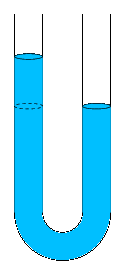

## Caso sin fricción.

Si se desprecia la fricción del tubo:
1. Calcula el nivel del agua por medio del método de Euler en el intervalo $0 < t < 10$ segundos.
2. Determina cuándo alcanza $y_{a}$ su máximo y su mínimo.

Utiliza $h=0.001$.

**Solución:**

Como primer paso debemos de escribir en la notación:
$$
\begin{align*}
\mathbf{F} (x, \mathbf{y}) = \begin{bmatrix}
y_{0}^{\prime} \\
y_{1}^{\prime}
\end{bmatrix}
\hspace{1.5cm}
\mathbf{y} (0) = \begin{bmatrix}
y_{0} (0) \\
y_{1} (0)
\end{bmatrix}
\end{align*}
$$
Por lo tanto, se tiene que:
$$
\begin{align*}
\begin{bmatrix}
y_{0}^{\prime} \\
y_{1}^{\prime}
\end{bmatrix}
=
\begin{bmatrix}
y_{1} \\
-2 \, g \, y_{0}
\end{bmatrix}
\hspace{1.5cm}
\begin{bmatrix}
y_{0} (0) \\
y_{1} (0)
\end{bmatrix}
=
\begin{bmatrix}
2 \\
0
\end{bmatrix}
\end{align*}
$$

Por lo que ya podemos pasar a la codificación.

In [ ]:
%matplotlib inline

from Codigos.metodosDirectos import euler
import numpy as np
import matplotlib.pyplot as plt

def F(x, y):
    f = np.zeros(2)
    f[0] = y[1]
    f[1] = - 2 * g * y[0]
    
    return f

g = 9.81
x = 0.0
xAlto = 10.
y = np.array([2., 0.])
h = 0.001

X, Y = euler(F, x, y, xAlto, h)

plt.plot(X, Y[:,0])
plt.title('Nivel del agua en el tubo - Método de Euler')
plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento [cm]')
plt.xlim([0, 10])
plt.axhline(y=0, ls='dashed', lw=0.7, color='k')
plt.show()

## Caso con fricción.

Repite el problema anterior, pero ahora suponiendo que hay fricción en el tubo de forma que la ecuación de movimiento es:
$$
\begin{align*}
L \, y_{a}^{\prime \prime} = - 2 \, g \, y_{a} - \beta \, y_{a}{\prime}
\end{align*}
$$
donde $\beta = 0.8$ m/s. Usa nuevamente $h = 0.001$.

**Solución:**

Para considerar el término con fricción, reescribimos el problema de la siguiente manera:
$$
\begin{align*}
\begin{bmatrix}
y_{0}^{\prime} \\
y_{1}^{\prime}
\end{bmatrix}
=
\begin{bmatrix}
y_{1} \\
-2 \, g \, y_{0} - \beta \, y_{1}
\end{bmatrix}
\hspace{1.5cm}
\begin{bmatrix}
y_{0} (0) \\
y_{1} (0)
\end{bmatrix}
=
\begin{bmatrix}
2 \\
0
\end{bmatrix}
\end{align*}
$$

In [ ]:
def F(x, y):
    f = np.zeros(2)
    f[0] = y[1]
    f[1] = - 2 * g * y[0] - beta * y[1]
    
    return f

beta = 0.8

X, Y = euler(F, x, y, xAlto, h)

plt.plot(X, Y[:,0])
plt.title('Nivel del agua en el tubo con fricción - Método de Euler')
plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento [cm]')
plt.xlim([0, 10])
plt.axhline(y=0, ls='dashed', lw=0.7, color='k')
plt.show()